# Data analysis

In [1]:
import matplotlib.pyplot as plt
%matplotlib inline

# Scipy offers many statistical functions, among which the Pearson and Spearman correlation measures.
from scipy.stats import pearsonr, spearmanr


### 1) Load datasets from BIN file

In [2]:
wes_title='wes2015'
aida_title='aida'
n3_title='n3'

titles=[aida_title, n3_title]

In [3]:
import pickle
data_articles={}

for title in titles:
    with open('%s.bin' % title, 'rb') as outfile:
        data_articles[title]=pickle.load(outfile)


### 2) Distribution of AIDA collections 

In [18]:
from collections import defaultdict

d=defaultdict(int)
for article in data_articles[aida_title]:
    d[article.collection]+=1
print(d)

d=defaultdict(int)
for article in data_articles[n3_title]:
    d[article.collection]+=1
print(d)

defaultdict(<class 'int'>, {'aidatesta': 216, 'aidatrain': 946, 'aidatestb': 231})
defaultdict(<class 'int'>, {'reuters128': 128, 'rss500': 500})


### 3) Get frequency distributions of forms and instances

In [19]:
#all_articles=aida_articles.union(wes_articles)
all_articles=set()
for articles in data_articles.values():
    all_articles |= articles

In [20]:
len(all_articles)

2021

In [21]:
import plot_utils

instances_cnt={}
forms_cnt={}
for title, articles in data_articles.items():
    instances_cnt[title], forms_cnt[title]=plot_utils.get_mention_counts(articles)

all_cnt_instances, all_cnt_forms=plot_utils.get_mention_counts(all_articles)
instances_cnt[aida_title].pop('--NME--', None)


### 4) Plot frequency distribution of FORMS

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**4.1. Linear plots **

In [22]:
import seaborn as sns
sns.set_style("whitegrid")

In [23]:
save=True

aida


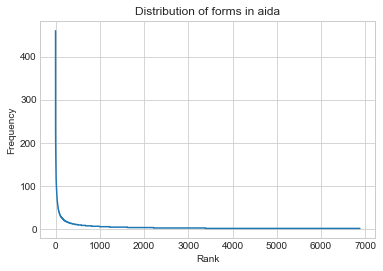

n3


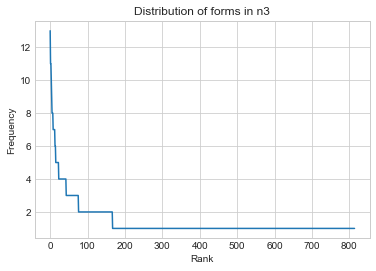

In [24]:
for title, data_forms_cnt in forms_cnt.items():
    print(title)
    plot_utils.plot_freq_dist(data_forms_cnt, 'forms in ' + title, 
                              x_axis='Rank', save=save)
#    plot_utils.plot_freq_dist(aida_cnt_forms, 'forms in ' + aida_title, 
#                              x_axis='Rank', save=save)

**4.2. Log-log plots**

In [27]:
from collections import OrderedDict
import numpy as np
def plot_multi_freq_dist(forms_cnt, kind='', x_axis='Entity mentions', loglog=False, b=2, save=False):
    fig = plt.figure()
    for title, data_forms_cnt in forms_cnt.items():
        print(title)
        y = OrderedDict(data_forms_cnt.most_common())
        v=list(y.values())
        k=np.arange(0,len(v),1)
        if loglog:
                plt.loglog(k,v, basex=b)
        else:
                plt.plot(k,v)
    plt.ylabel('Frequency')
    plt.xlabel(x_axis)
    if kind:
        if loglog:
                p_title = 'Log-Log distribution of %s' % kind
        else:
                p_title = 'Distribution of %s' % kind
        plt.title(p_title)
    plt.show()
    if save:
            if title:
                    fig.savefig('img/%s.png' % p_title.lower().replace(' ', '_'), bbox_inches='tight')
            else:
                    fig.savefig('img/%d.png' % random.randint(0,1000000), bbox_inches='tight')

aida
n3


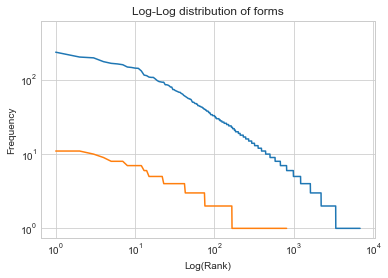

In [29]:
#for title, data_forms_cnt in forms_cnt.items():
#    plot_utils.plot_freq_dist(data_forms_cnt, 'forms in ' + title, 
#                          x_axis='Log(Rank)', loglog=True, 
#                          b=10, save=save)

plot_multi_freq_dist(forms_cnt, kind='forms', 
                          x_axis='Log(Rank)', loglog=True, 
                          b=10, save=save)

**4.3. Slope** 

In [30]:
for title, data_forms_cnt in forms_cnt.items():
    print('Slope of %s' % title)
    print(plot_utils.calculate_slope(data_forms_cnt))
    print()
print('ALL')
print(plot_utils.calculate_slope(all_cnt_forms))

Slope of aida
LinregressResult(slope=-0.9085055184143714, intercept=7.8255514656094025, rvalue=-0.980230426304651, pvalue=0.0, stderr=0.002211666075089343)

Slope of n3
LinregressResult(slope=-0.4291157858478489, intercept=2.6598145891571967, rvalue=-0.9145065635986074, pvalue=9.4e-322, stderr=0.0066578990862902745)

ALL
LinregressResult(slope=-0.89150386214697, intercept=7.732402257777029, rvalue=-0.9793746816704233, pvalue=0.0, stderr=0.002117710734137212)


### 5) Plot frequency distribution of INSTANCES

<span style="background-color:lightgreen">Section 5.1. of the paper</span>

**5.1. Linear plots **

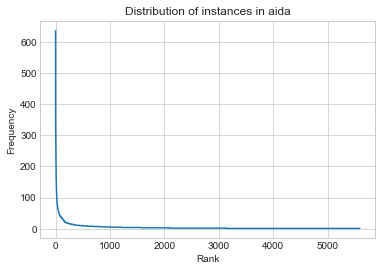

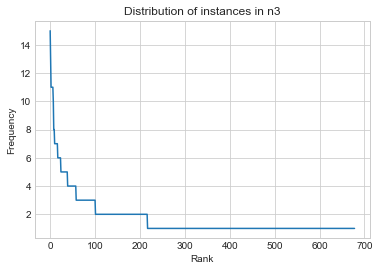

In [31]:
for title, data_instances_cnt in instances_cnt.items():
    plot_utils.plot_freq_dist(data_instances_cnt, 'instances in ' + title, 
                              x_axis='Rank', save=save)

**5.2. Log-log plots**

aida
n3


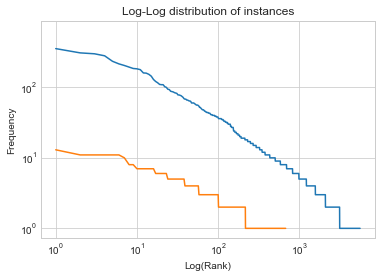

In [33]:
#for title, data_instances_cnt in instances_cnt.items():
#    plot_utils.plot_freq_dist(data_instances_cnt, 'instances in ' + title, 
#                              x_axis='Log(Rank)', loglog=True, 
#                              b=10, save=save)
    
plot_multi_freq_dist(instances_cnt, kind='instances', 
                              x_axis='Log(Rank)', loglog=True, 
                              b=10, save=save)

**5.3. Slope** 

In [34]:
for title, data_instances_cnt in instances_cnt.items():
    print('Slope of %s' % title)
    print(plot_utils.calculate_slope(data_instances_cnt))
    print()
print('ALL')
print(plot_utils.calculate_slope(all_cnt_instances))

Slope of aida
LinregressResult(slope=-0.9657417477440569, intercept=8.196237374207712, rvalue=-0.9817597280327227, pvalue=0.0, stderr=0.0025012217726795715)

Slope of n3
LinregressResult(slope=-0.5418946841833255, intercept=3.330739533590001, rvalue=-0.9503337969510662, pvalue=0.0, stderr=0.006820706078897001)

ALL
LinregressResult(slope=-0.9508303826500141, intercept=8.129758437316264, rvalue=-0.9818528987899069, pvalue=0.0, stderr=0.0023473874212897004)


### 6) PageRank distribution of instances


#### 6.1. Obtain pagerank data

In [35]:
from collections import Counter

skip_zeros=True
pr_agg={}
pr_uniq={}
pageranks={}

for title, articles in data_articles.items():
    pr_agg[title], pr_uniq[title], this_pageranks=\
        plot_utils.get_pageranks(articles, skip_zeros=skip_zeros)
    pageranks[title] = Counter(this_pageranks)


#### 6.2. Plot the PR distribution

aida
n3


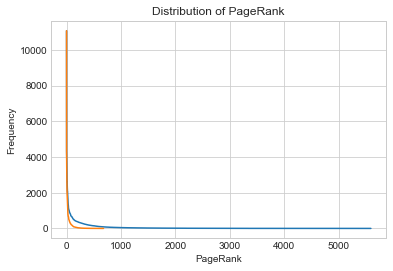

In [38]:
for title, pr in pageranks.items():
    plot_utils.plot_freq_dist(pr, 
                               title='PageRank in ' + title, 
                               x_axis='PageRank', save=True)
plot_multi_freq_dist(pageranks, 
                          kind='PageRank', 
                          x_axis='PageRank', save=True)

#### 6.3. Plot the PR distribution (log-log plot)

aida
n3


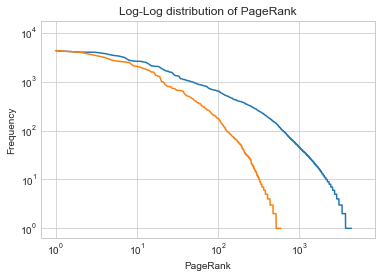

In [39]:
#for title, pr in pageranks.items():
#    plot_utils.plot_freq_dist(pr, 'PageRank in ' + title, 
#                              x_axis='PageRank', loglog=True, 
#                              b=10, save=save)
plot_multi_freq_dist(pageranks, kind='PageRank', 
                          x_axis='PageRank', loglog=True, 
                          b=10, save=save)

#### 6.4. Inspect individual pagerank

In [40]:
# United_States has a max pageRank of 11066. 
pr=11066
print(pr_agg[n3_title][pr], pr_agg[aida_title][pr], pr_uniq[aida_title][pr])


11 636 1


# Note: from here onwards most plots given stats for both datasets jointly


### 7) Prepare ambiguity and variance data

In [41]:
interpretations, references = plot_utils.get_interpretations_and_references(all_articles, 
                                                                            skip_nils=True)

### 8) Aggregation per ambiguity

<span style="background-color:lightgreen">Section 5.2. of the paper</span>

In [42]:
ambiguity={}
for form,meanings in interpretations.items():
    ambiguity[form]=len(meanings)
ambiguity

{'NYC': 1,
 'Michigan National Bank': 1,
 'Detroit': 2,
 'BENETTON': 1,
 'BELGRADE': 1,
 'Benetton': 2,
 'Italy': 3,
 'Russia': 2,
 'HENKE': 1,
 'MILWAUKEE': 3,
 'WOODS': 1,
 'Wisconsin': 1,
 'Nolan Henke': 1,
 'Greater Milwaukee Open': 1,
 'Tiger Woods': 1,
 'Henke': 1,
 'Bob Estes': 1,
 'Billy Andrade': 1,
 'Duffy Waldorf': 1,
 'Jesper Parnevik': 1,
 'Woods': 1,
 'U.S. Amateur Championship': 1,
 'Andrew Magee': 1,
 'PGA Tour': 1,
 'BellSouth Classic': 1,
 'Estes': 2,
 'Texas Open': 1,
 'Nortel Open': 1,
 'Billy Mayfair': 1,
 'World Series of Golf': 1,
 'U.S. Open': 2,
 'Payne Stewart': 1,
 'Scott Hoch': 1,
 'Phil Mickelson': 1,
 'Mark Brooks': 1,
 'Tom Lehman': 1,
 'BANGKOK': 1,
 'Thailand': 1,
 'Siam Commercial Bank': 1,
 'Reuters': 1,
 'Bangkok': 1,
 'TOKYO': 1,
 'Haneda': 1,
 'Tokyo': 2,
 'Itami': 1,
 'Osaka': 1,
 'Indians': 3,
 'Manny Acta': 1,
 'Netanyahu': 1,
 'Weizman': 1,
 'Arafat': 1,
 'JERUSALEM': 1,
 'Israeli': 1,
 'Ezer Weizman': 1,
 'Yasser Arafat': 1,
 'Benjamin Netanya

In [43]:
agg_per_ambiguity=defaultdict(int)
for form, amb in ambiguity.items():
    agg_per_ambiguity[amb]+=1

In [44]:
agg_per_ambiguity

defaultdict(int, {1: 7037, 2: 381, 3: 84, 4: 29, 5: 10, 6: 3, 12: 1})

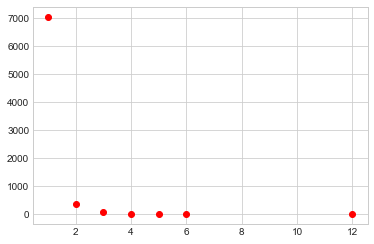

In [45]:
import matplotlib.pyplot as plt

plt.plot(list(agg_per_ambiguity.keys()), list(agg_per_ambiguity.values()), 'ro')
plt.show()

In [46]:
sum(i for j,i in agg_per_ambiguity.items() if j>1)

508

['AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (with NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'AIDA (without NILs)', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'WES2015', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both', 'both'] [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13] [10393, 465, 114, 26

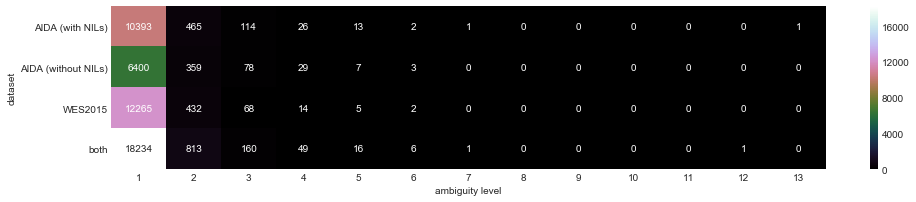

In [47]:
plot_utils.annotated_heatmap(['AIDA (with NILs)', 'AIDA (without NILs)', 'WES2015', 'both'], 
                  [1,2,3,4,5,6,7,8,9,10,11,12,13], 
                  [10393, 465, 114, 26, 13, 2, 1, 0, 0, 0, 0, 0, 1,
                   6400, 359, 78, 29, 7, 3, 0, 0, 0, 0, 0, 0, 0,
                    12265, 432, 68, 14, 5, 2, 0, 0, 0, 0, 0, 0, 0,
                   18234, 813, 160, 49, 16, 6, 1, 0, 0, 0, 0, 1, 0
                  ], 
                 x_lbl='ambiguity level')

#### AIDA: This means that there are 622 (or 477 without NILs) out of ~11k forms that have some ambiguity in the data

### 9) Aggregation per variance

<span style="background-color:lightgreen">Section 5.3. of the paper</span>

In [ ]:
variance={}
for meaning,forms in references.items():
    variance[meaning]=len(forms)
variance

In [ ]:
agg_per_variance=defaultdict(int)
for uri, v in variance.items():
    agg_per_variance[v]+=1

In [ ]:
agg_per_variance

In [ ]:
sum(i for j,i in agg_per_variance.items() if j>1)

In [ ]:
plot_utils.annotated_heatmap(['AIDA (without NILs)', 'WES2015', 'both'],
                  [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18],
                  [4156, 1118, 230, 56, 19, 10, 6, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0,
                  7153, 1456, 502, 212, 92, 40, 15, 11, 3, 0, 0, 5, 1, 1, 0, 0, 0, 0,
                   10924, 2530, 759, 278, 110, 50, 19, 17, 6, 1, 1, 6, 0, 1, 0, 0, 0, 1
                  ],
                  x_lbl='variance level'
)

### 10) Correlation between frequency of forms and ambiguity

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

In [ ]:
plot_utils.frequency_correlation(ambiguity, 
                                 all_cnt_forms, 
                                 title='Correlation between form ambiguity and frequency', 
                                 x_label='Ambiguity of forms', 
                                 y_label='Frequency of forms',
                                 save=save)

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline




In [ ]:
form_y_freq, form_x_amb = plot_utils.prepare_scatter_plot(
    all_cnt_forms, ambiguity)

plot_utils.scatter_plot(form_x_amb, form_y_freq,
                        x_axis='Ambiguity',
                        y_axis='Frequency',
                        title='Correlation between ambiguity and frequency (SCATTER PLOT)',
                        save=True,
                        degree=1
                        )


In [ ]:
correlation, significance = spearmanr(form_x_amb,form_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

In [ ]:
plot_utils.plot_line_with_whiskers(form_x_amb, np.log(form_y_freq),
                        xl='ambiguity',
                        yl='Log(frequency)',
                        title='Correlation between FORM ambiguity and frequency',
                        save=save)

In [ ]:
%matplotlib inline
import seaborn as sns
import pandas as pd
sns.set(style='white')

print(type(form_x_amb), type(form_y_freq))
x1 = pd.Series(form_x_amb, name="$X_1$")
x2 = pd.Series(form_y_freq, name="$X_2$")
g=sns.jointplot(x1, x2, kind='kde', size=7, space=0)

In [ ]:
bp_data = plot_utils.prepare_box_plot(form_x_amb, form_y_freq)

In [ ]:
plot_utils.box_plot(bp_data, x_axis='Ambiguity', 
                    y_axis='Frequency',
                    title='Correlation between ambiguity and frequency (BOX PLOT)',
                    y_lim=200,
                    save=save)

### 11) Correlation between frequency of instances and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

In [ ]:
plot_utils.frequency_correlation(variance, 
                                 all_cnt_instances, 
                                 title='Correlation between instance variance and frequency (LINE PLOT)', 
                                 x_label='Variance of instances', 
                                 y_label='Frequency of instances',
                                 xlim=[1,15],
                                 save=save)

In [ ]:

insta_y_freq, insta_x_var = plot_utils.prepare_scatter_plot(
    all_cnt_instances, variance)


plot_utils.scatter_plot(insta_x_var, insta_y_freq, 
                        x_axis='Variance',
                        y_axis='Frequency',
                        title='Correlation between variance of instances and frequency (SCATTER PLOT)',
                        save=True
                        )


In [ ]:
correlation, significance = spearmanr(insta_x_var, insta_y_freq)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

In [ ]:
plot_utils.plot_line_with_whiskers(insta_x_var, np.log(insta_y_freq),
                        xl='variance',
                        yl='Log(frequency)',
                        title='Correlation between INSTANCE variance and frequency',
                        xlim=[0,None],
                        save=save)

In [ ]:
bp_data = plot_utils.prepare_box_plot(insta_x_var, insta_y_freq)

In [ ]:
plot_utils.box_plot(bp_data, x_axis='Variance', 
                    y_axis='Frequency',
                    title='Correlation between variance and frequency (BOX PLOT)',
                    y_lim=200,
                    save=save)

### 12) Correlation between PageRank and variance

<span style="background-color:lightgreen">Section 5.4. of the paper</span>

In [ ]:
all_pr_instances = {}
for article in all_articles:
    for mention in article.entity_mentions:
        if mention.gold_link!='--NME--' and (not skip_zeros or int(mention.gold_pr)>0):
            all_pr_instances[mention.gold_link]=int(mention.gold_pr)

In [ ]:
plot_utils.frequency_correlation(variance, 
                                 all_pr_instances, 
                                 title='Correlation between variance of instances and PageRank (LINE PLOT)',
                                 x_label='Variance of instances', 
                                 y_label='PageRank of instances',
                                 save=save)

In [ ]:
insta_y_pr, insta_x_var2 = plot_utils.prepare_scatter_plot(
    all_pr_instances, variance)

plot_utils.scatter_plot(insta_x_var2, insta_y_pr, 
                        x_axis='Variance',
                        y_axis='PageRank',
                        title='Correlation between variance of instances and PageRank (SCATTER PLOT)',
                        save=True
                        )

In [ ]:
correlation, significance = spearmanr(insta_x_var2, insta_y_pr)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

In [ ]:
plot_utils.plot_line_with_whiskers(insta_x_var2, np.log(insta_y_pr),
                        xl='variance',
                        yl='Log(PageRank)',
                        title='Correlation between INSTANCE variance and PageRank',
                        xlim=[0,None],
                        save=save)

In [ ]:
bp_data = plot_utils.prepare_box_plot(insta_x_var2, insta_y_pr)

In [ ]:
plot_utils.box_plot(bp_data, x_axis='Variance', 
                    y_axis='PageRank',
                    title='Correlation between variance and PageRank (BOX PLOT)',
                    y_lim=2000,
                    save=save)

### 13) Correlation between PageRank and frequency

In [ ]:
all_pr_instances

In [ ]:
plot_utils.frequency_correlation(all_pr_instances, 
                                 all_cnt_instances, 
                                 title='Correlation between PageRank of instances and frequency (LINE PLOT)', 
                                 x_label='PageRank of instances', 
                                 y_label='Frequency of instances',
                                 save=save)

In [ ]:
insta_x_pr_2, insta_y_freq2 = plot_utils.prepare_scatter_plot(
    all_pr_instances, all_cnt_instances)

plot_utils.scatter_plot(np.log(insta_x_pr_2), np.log(insta_y_freq2), 
                        x_axis='Log(PageRank)',
                        y_axis='Log(Frequency)',
                        title='Correlation between PageRank of instances and corpus frequency (SCATTER PLOT)',
                        save=True
                        )

In [ ]:
log1, log2=np.log(insta_x_pr_2), np.log(insta_y_freq2)
accumulate_fr_per_pr=defaultdict(list)
for point_pr, point_fr in zip(log1, log2):
    int_pr=int(point_pr)
    accumulate_fr_per_pr[int_pr].append(point_fr)

In [ ]:
x=[]
y=[]
for i in range(max(accumulate_fr_per_pr.keys())+1):
    print(i, np.mean(accumulate_fr_per_pr[i]))
    x.append(i)
    y.append(np.mean(accumulate_fr_per_pr[i]))

In [ ]:
fig = plt.figure()
fake = pd.DataFrame({'pr': x, 'freq': y})
ax = sns.barplot(x = 'pr', y = 'freq', 
              data = fake, 
              color = 'green')
ax.set(xlabel='int (ln (PageRank))', ylabel='mean (ln (Frequency))', 
       title='Correlation between PageRank and corpus frequency (Bar plots)')
plt.show()
fig.savefig('img/pagerank_frequency.png')

In [ ]:
correlation, significance = spearmanr(insta_x_pr_2, insta_y_freq2)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

In [ ]:
plot_utils.plot_line_with_whiskers(insta_x_pr_2, insta_y_freq2,
                        xl='PageRank',
                        yl='Frequency',
                        title='Correlation between INSTANCE PageRank and frequency',
                        save=save)

### 14) Inspection of the distribution within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [ ]:
form='World Cup' # this is the form with max ambiguity (of 12) in our dataset

insts=plot_utils.get_form_distribution(all_articles, form)

import numpy as np
import matplotlib.pyplot as plt
ks=[]
vs=[]
for kv in insts:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

In [ ]:
#fig = plt.figure()
fig, ax = plt.subplots()

br = ax.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,15,16,17,18,19,20])

plot_utils.autolabelh(br,ax)

fig.savefig('img/world_cup_form_freq.png', bbox_inches='tight')

### 15) Inspection of the distribution of PageRank within the instances of a single form

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [ ]:
form='World Cup' # this is the form with max ambiguity
import operator


ks=[]
vs=[]
entries={}
for instance in interpretations[form]:
    print(instance, '\t', all_pr_instances[instance])
    entries[instance]=all_pr_instances[instance]

    
entries = sorted(entries.items(),key = operator.itemgetter(1),reverse = True)

for k,v in entries:
    ks.append(k)
    vs.append(v)

x = np.arange(len(ks))

In [ ]:
fig, ax = plt.subplots()

br=plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,20,40,60,80,100,120,140,160,180,200])

plot_utils.autolabelh(br, ax)

fig.savefig('img/world_cup_form_pr.png', bbox_inches='tight')

In [ ]:
prs=[]
freqs=[]
labels=[]
for form2, pr in reversed(entries):
    for form, freq in insts:
        if form==form2:
            print(form, freq, pr)
            freqs.append(freq)
            prs.append(pr)
            labels.append(form)

In [ ]:
plot_utils.scatter_plot(np.array(np.log(prs)), np.array(np.log(freqs)), 
                        x_axis='Log(PageRank)',
                        y_axis='Log(Frequency)',
                        title='Correlation between PageRank and frequency for instances of a single form (SCATTER PLOT)',
                        save=True,
                        labels=labels
                        )

In [ ]:
correlation, significance = spearmanr(prs, freqs)
print('The Spearman correlation between X and Y is:', correlation, '. Significance: ', significance)

### 16) Inspection of the frequency distribution within the forms of a single instance

<span style="background-color:lightgreen">Section 5.5. of the paper</span>

In [ ]:
instance='United_States' # this is both the instance with max variance and max frequency

refs=plot_utils.get_instance_distribution(all_articles, instance)

ks=[]
vs=[]
for kv in refs:
    ks.append(kv[0])
    vs.append(kv[1])

x = np.arange(len(ks))

In [ ]:
fig, ax = plt.subplots()

br=plt.barh(x, vs)
plt.yticks(x, ks, rotation=0)
plt.xticks([0,50,100,150,200,250,300,350,400,450,500])
plt.xlabel('Frequency of occurence')

plot_utils.autolabelh(br,ax)

fig.savefig('img/world_cup_insta_freq.png', bbox_inches='tight')

### 17) Entropy

In [ ]:
import sys
sys.exit()

In [ ]:
from scipy.stats import entropy
all_entropies=[]
for form in interpretations:
    counts=plot_utils.get_form_counts(all_articles, form)
    counts=list(counts)
    all_entropies.append(entropy(counts, base=len(counts)))

In [ ]:


sns.distplot(all_entropies, kde=False)

In [ ]:
all_entropies_lz = []
for ent in all_entropies:
    if ent>0.0:
        all_entropies_lz.append(ent)

In [ ]:
len(all_entropies_lz)

In [ ]:
sns.distplot(all_entropies_lz, kde=False)

In [ ]:
all_entropies_lz